In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [2]:
os.chdir("d://data")
os.getcwd()

'd:\\data'

In [3]:
% matplotlib inline

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m') # strptime: string parsed to time
data = pd.read_csv('AirPassengers.csv', index_col = 'Month', date_parser=dateparse)

In [9]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
ts = data['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [11]:
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    # equal to
    # rolmean = []
    # for i in range(len(timeseries)):
    #    if i >= 12:
    #       rolmean.append(np.mean(timeseries[i-12: i]))
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print("Result of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


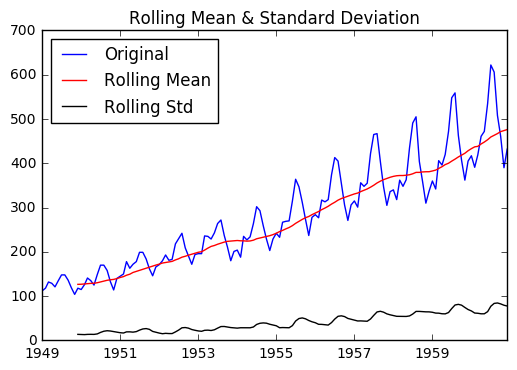

Result of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
test_stationary(ts)

### Estimating & Eliminating Trend

One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a **log transform** here for simplicity:

d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  app.launch_new_instance()


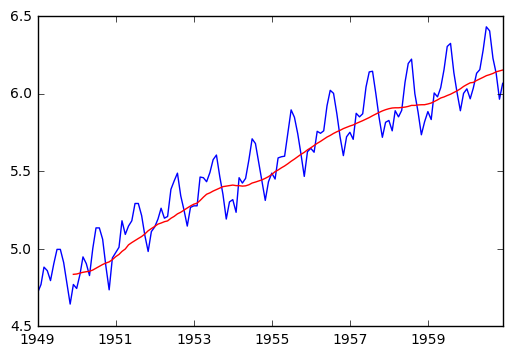

In [7]:
# Use log transformation to reduce trend
ts_log = np.log(ts)
moving_avg = pd.rolling_mean(ts_log, window=12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

### Moving average

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics.

In [53]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
Name: #Passengers, dtype: float64

In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationary(ts_log_moving_avg_diff)

However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is **exponentially weighted moving average** where weights are assigned to all the previous values with a decay factor. Find details here. This can be implemented in Pandas as:

d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,ignore_na=False,adjust=True,halflife=12).mean()
  from ipykernel import kernelapp as app


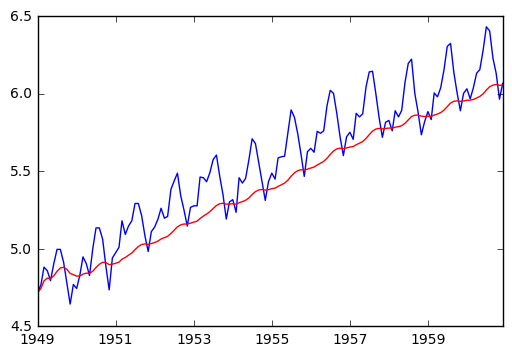

In [11]:
# use exponentially weighted moving average instead of moving average
expweighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')

d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


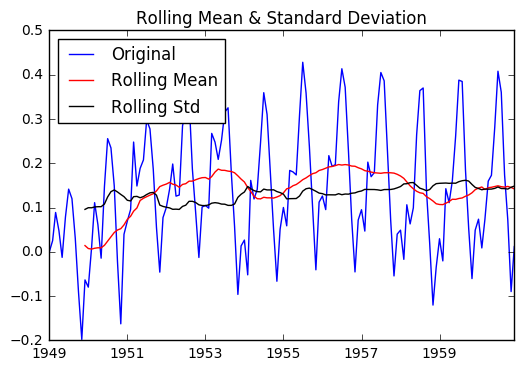

Result of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (10%)            -2.578770
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64


In [12]:
ts_log_ewma_diff = ts_log - expweighted_avg
# test statistic is smaller than the 1% critical value
test_stationary(ts_log_ewma_diff)

### Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of the observation at a particular instant with that at the previous instant. This mostly works well in improving stationarity. First order differencing can be done in Pandas as:

d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


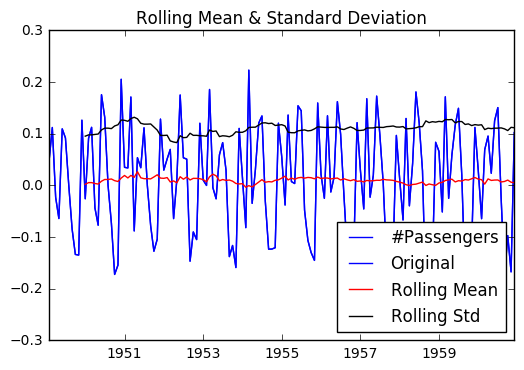

Result of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (10%)            -2.578960
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
dtype: float64


In [13]:
ts_log_diff = ts_log - ts_log.shift() # shift: moving data right. this means this month value - last month value
ts_log_diff.dropna(inplace=True)
plt.plot(ts_log_diff)
test_stationary(ts_log_diff)

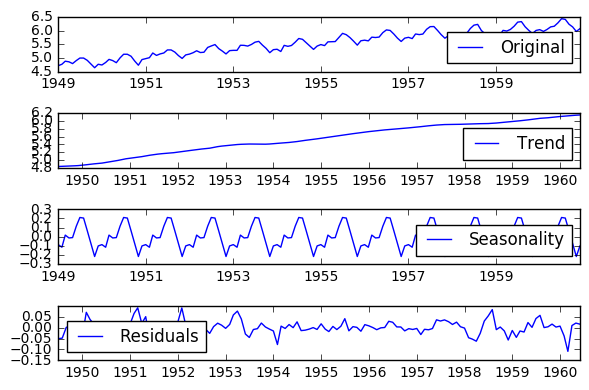

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [9]:
from statsmodels.tsa.stattools import acf, pacf

In [36]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

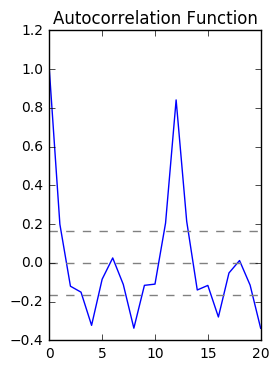

In [37]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

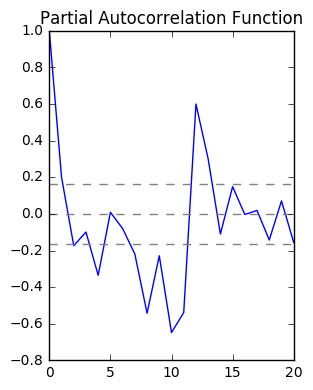

In [16]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [17]:
from statsmodels.tsa.arima_model import ARIMA

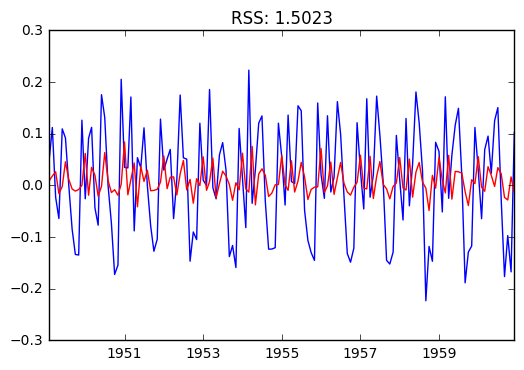

In [18]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

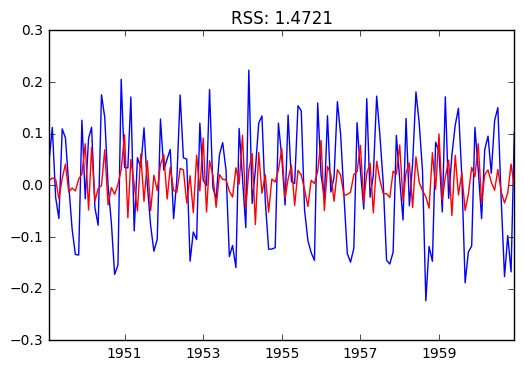

In [19]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

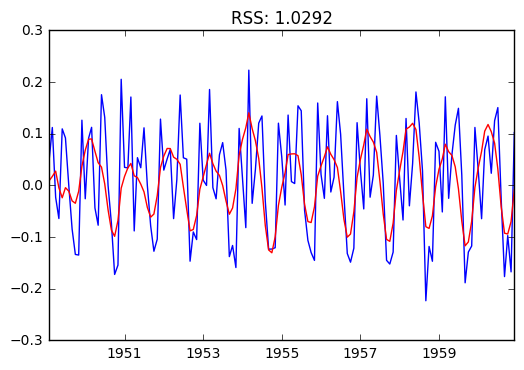

In [48]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
# split train and test
size = len(ts_log)//10*7
train = ts_log[:size]
test = ts_log[size:]
model1 = ARIMA(train, order=(2,1,2))
model_fit1 = model.fit(disp=-1)
output1 = model_fit1.forecast(len(test))[0]

history = [x for x in train]
output2 = pd.Series(np.zeros(len(test)), index=test.index)
for t in range(len(test)):
    model2 = ARIMA(history, order=(2,1,0)) # 此时history为list，q值只能为0
    model_fit2 = model2.fit(disp=-1)
    # one step forecast
    yhat = model_fit2.forecast()[0][0]
    # store forecast and ob
    output2[t] = yhat
    history.append(yhat)

history = [x for x in train]
output22 = pd.Series(np.zeros(len(test)), index=test.index)
for t in range(len(test)):
    model22 = ARIMA(history, order=(2,1,0)) # 此时history为list，q值只能为0
    model_fit22 = model22.fit(disp=-1)
    # one step forecast
    yhat = model_fit22.forecast()[0][0]
    # store forecast and ob
    output22[t] = yhat
    history.append(test[t])    
    
from dateutil.relativedelta import relativedelta
mon = relativedelta(months=1) # 增加一个月    
output3 = pd.Series(np.zeros(len(test)), index=test.index)
ta = train.copy()
for t in range(len(test)):
    model3 = ARIMA(ta, order=(12,1,0)) # 此时train为TS
    model_fit3 = model3.fit(disp=-1)
    yhat = model_fit3.forecast()[0][0]
    output3[t] = yhat
    tmp = pd.Series(yhat, index=[ta.index[-1] + mon])
    ta = ta.append(tmp, verify_integrity=True)

output33 = pd.Series(np.zeros(len(test)), index=test.index)
ta = train.copy()
for t in range(len(test)):
    model33 = ARIMA(ta, order=(12,1,0)) # 此时train为TS
    model_fit33 = model33.fit(disp=-1)
    yhat = model_fit33.forecast()[0][0]
    output33[t] = yhat
    tmp = pd.Series(test[t], index=[ta.index[-1] + mon])
    ta = ta.append(tmp, verify_integrity=True)
    
output1 = pd.Series(output1, index=test.index)
test_diff = test - test.shift()
output1_diff = output1 - output1.shift()
output2_diff = output2 - output2.shift()
output22_diff = output22 - output22.shift()
output3_diff = output3 - output3.shift()
output33_diff = output33 - output33.shift()


test_diff.dropna(inplace=True)
output1_diff.dropna(inplace=True)
output2_diff.dropna(inplace=True)
output22_diff.dropna(inplace=True)
output3_diff.dropna(inplace=True)
output33_diff.dropna(inplace=True)

plt.plot(test_diff.tolist(), label = 'Original')
# plt.plot(output1_diff.tolist(), color='red', label = 'output1')
# plt.plot(output2_diff.tolist(), color='green', label = 'output2')
plt.plot(output22_diff.tolist(), label = 'output22')
plt.plot(output3_diff.tolist(), label = 'output3')
plt.plot(output33_diff.tolist(), label = 'output33')


plt.legend(loc='best')
plt.title('RSS1: %.4f, RSS2: %.4f'% (np.sum(np.subtract(output22_diff.tolist(),test_diff.tolist())**2), np.sum(np.subtract(output33_diff.tolist(),test_diff.tolist())**2)))

d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
d:\Users\ltwu\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\model.py

In [21]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [22]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [23]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

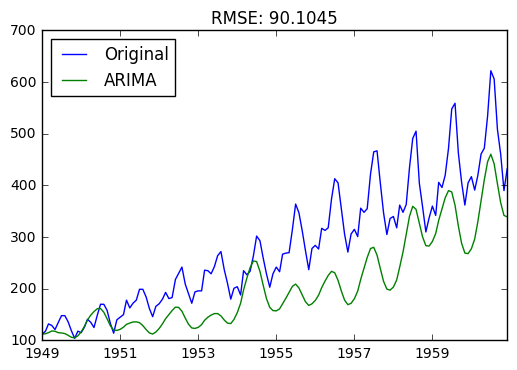

In [27]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts, label = 'Original')
plt.plot(predictions_ARIMA, label = 'ARIMA')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))